In [22]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [23]:
%cd /gdrive/My Drive/image-compression-kmeans-master

/gdrive/My Drive/image-compression-kmeans-master


### Image Compression using K-Means Algorithm

In [24]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline

### Reading the image

In [25]:
image = io.imread('dog.png')

(450, 900, 3)


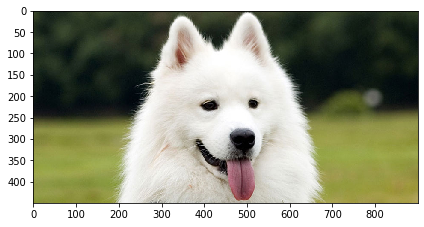

In [26]:
io.imshow(image)
print(image.shape)

### Preprocessing

In [27]:
rows, cols = image.shape[0], image.shape[1]
vector_image = image.reshape(rows * cols, 3)

In [28]:
print(vector_image.shape)
print(vector_image)

(405000, 3)
[[ 62  74  50]
 [ 61  73  49]
 [ 60  72  48]
 ...
 [175 162  84]
 [174 161  83]
 [174 161  83]]


### Modelling

In [29]:
kMeans = KMeans(n_clusters = 10)
kMeans.fit(vector_image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[243, 243, 240],
       [ 34,  44,  30],
       [149, 154,  69],
       [203, 199, 187],
       [ 99,  97,  60],
       [ 12,  21,  18],
       [177, 168, 148],
       [226, 224, 217],
       [141, 111, 111],
       [ 58,  66,  42]], dtype=uint8)

In [31]:
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(405000,)
(450, 900)


array([[9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

In [32]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 55376,
 1: 59156,
 2: 82302,
 3: 25966,
 4: 13411,
 5: 72396,
 6: 12553,
 7: 46788,
 8: 7012,
 9: 30040}

- The number of bit before encoding: 450 x 900 x 3 x 8 = 9720000
- The number of bit after encoding: 8 x 450  x 900 =  1215000

- The ratio compression is 9720000 / 1215000 = 8

### Reconstructing

In [33]:
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('dog_compressed_10.png', newImage)

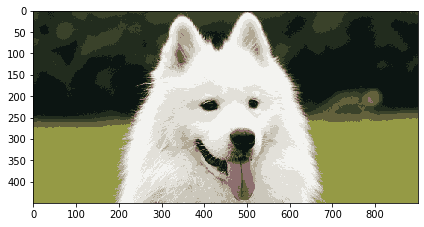

In [34]:
io.imshow(newImage)